In [2]:
from sklearn.datasets import load_boston

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
df=load_boston()
print(type(df))

<class 'sklearn.utils.Bunch'>


In [15]:
data=df.data
labels=df.target

In [16]:
dataframe=pd.DataFrame(data)
print(dataframe.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [19]:
dataframe.columns=df.feature_names
print(dataframe.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [20]:
# adding a column in table : 
dataframe['Price']=labels

In [21]:
print(dataframe.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


In [22]:
dataframe=dataframe.values

In [23]:
X=dataframe[:,:-1]
Y=dataframe[:,-1]

In [24]:
print(X.shape,Y.shape)

(506, 13) (506,)


In [28]:
# lets see the performance of linear regression : 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [35]:
lr=LinearRegression()
mse=cross_val_score(lr,X,Y,cv=5,scoring='neg_mean_squared_error')
mse=np.mean(mse)
print('error in case of linear regression : '+str(mse))

error in case of linear regression : -37.131807467699055


In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rg=Ridge()
parameters={'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(rg,parameters,scoring='neg_mean_squared_error',cv=5,)
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [39]:
print(ridge_regressor.best_params_)

{'alpha': 100}


In [40]:
print(ridge_regressor.best_score_)

-29.905701947540344


In [41]:
# lets see the performance on Lasso Regression
from sklearn.linear_model import Lasso
lr=Lasso()
parameters={'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lr,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2542.94634

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [42]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.531580220694856


In [43]:
# we r getting better performance in Ridge as compared to Lasso , but usually lasso dominates :) 
# in case of more no of features, we can see that .
# lets visualise the Performance :

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [45]:
lasso_predictions=lasso_regressor.predict(X_test)
ridge_predictions=ridge_regressor.predict(X_test)

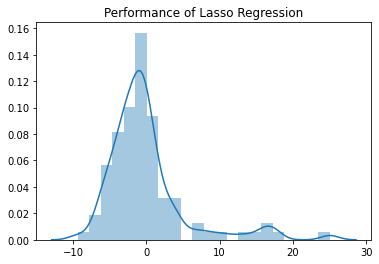

In [49]:
import seaborn as sns
plt.title('Performance of Lasso Regression')
sns.distplot(Y_test-lasso_predictions)
plt.show()

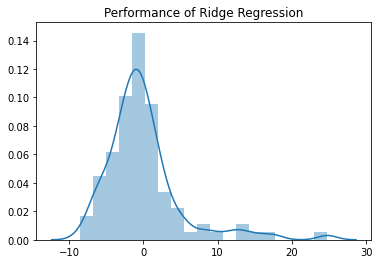

In [50]:
import seaborn as sns
plt.title('Performance of Ridge Regression')
sns.distplot(Y_test-ridge_predictions)
plt.show()